<a href="https://colab.research.google.com/github/agusabdulrahman/ML-Project/blob/main/Cryptocurrency_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem

I’ll start the task of Cryptocurrency price prediction by importing the necessary Python libraries and the dataset we need. For this task, I will collect the latest Bitcoin prices data from [Yahoo Finance(https://finance.yahoo.com/)], using the yfinance API.

In [ ]:
!pip install timedelta
!pip install datetime
!pip install autots

In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()
import plotly.graph_objects as go
from autots import AutoTS


In [ ]:
d1  = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days= 730)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [ ]:
data = yf.download(' BTC-USD',
                  start = start_date,
                   end = end_date,
                   progress=False)
data['Date'] = data.index
data = data[['Date', 'Open', 'High', 'Low',  "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

In [ ]:
print(data.head())

        Date          Open          High           Low         Close  \
0 2021-10-08  53802.144531  55922.980469  53688.054688  53967.847656   
1 2021-10-09  53929.781250  55397.945312  53735.144531  54968.222656   
2 2021-10-10  54952.820312  56401.304688  54264.257812  54771.578125   
3 2021-10-11  54734.125000  57793.039062  54519.765625  57484.789062   
4 2021-10-12  57526.832031  57627.878906  54477.972656  56041.058594   

      Adj Close       Volume  
0  53967.847656  34800873924  
1  54968.222656  32491211414  
2  54771.578125  39527792364  
3  57484.789062  42637331698  
4  56041.058594  41083758949  


In [ ]:
data.shape

(730, 7)

In [ ]:
figure = go.Figure(data=[go.Candlestick(x=data['Date'],
                                        open=data['Open'],
                                        high=data['High'],
                                        low=data['Low'],
                                        close=data['Close'])])
figure.update_layout(title = "Bitcoin Price Analysis",
                     xaxis_rangeslider_visible=False)
figure.show()


In [ ]:
correlation = data.corr()
print(correlation['Close'].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
Low          0.998462
High         0.998375
Open         0.996561
Volume       0.170611
Name: Close, dtype: float64


<ipython-input-12-11dc57fe5b26>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# Cryptocurrency Price Prediction Model

In [ ]:
model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple')
model = model.fit(data, date_col = 'Date', value_col='Close')
prediction = model.predict()

Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 7 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 8 with model DatepartRegression in generation 0 of 10
Epoch 1/50
22/22 [==============================] - 11s 8ms/step - loss: 0.4163
Epoch 2/50
22/22 [==============================] - 0s 7ms/step - loss: 0.4114
Epoch 3/50
22/22 [==============================] - 0s 9ms/step - loss: 0.4063
Epoch 4/50
22/22 [==============================] - 0s 8ms/step - loss: 0.4029
Epoch 5/50
22/22 [==============================] - 0s 6ms/step - loss: 0.4023
Epoch 6/50
22/22 [==============================] - 0s 7ms/step - loss: 0.4008
Epoch 7/50
22/22 [==============================] - 0s 8ms/step - loss: 0.3973
Epoch 8/50
22/22 [==============================] - 0s 8ms/step - loss: 0.3935
Epoch 9/50
22/22 [==============================] - 0s 7ms/step - loss: 0.3926
Epoch 10/50
22/22 [==============================] - 0s 7ms/step - loss: 0.3915
Epoch 11/50
22/22 [==============================] - 0s 10ms/step - loss: 0.3960
Epoch 12/50
22/22 [==============================] - 0s 8ms

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 36 with model FBProphet in generation 0 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_2xnbtup/oy_qprem.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_2xnbtup/3dnr1u9_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39959', 'data', 'file=/tmp/tmp_2xnbtup/oy_qprem.json', 'init=/tmp/tmp_2xnbtup/3dnr1u9_.json', 'output', 'file=/tmp/tmp_2xnbtup/prophet_modelxrwtvzt4/prophet_model-20231008043310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:33:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:33:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 37 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 37 in generation 0: GluonTS
Model Number: 38 with model MultivariateRegression in generation 0 of 10
Model Number: 39 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 39 in generation 0: MultivariateRegression
Model Number: 40 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 40 in generation 0: DatepartRegression
Model Number: 41 with model SeasonalNaive in generation 0 of 10
Model Number: 42 with model DatepartRegression in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model UnobservedComponents 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning:

invalid val

Model Number: 69 with model FBProphet in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 69 in generation 0: FBProphet
Model Number: 70 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 70 in generation 0: GluonTS
Model Number: 71 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 71 in generation 0: UnobservedComponents
Model Number: 72 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 72 in generation 0: VAR
Model Number: 73 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 73 in generation 0: VECM
Model Number: 74 with model ARIMA in genera

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[04:33:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 79 with model UnivariateMotif in generation 0 of 10
Model Number: 80 with model MultivariateMotif in generation 0 of 10
Model Number: 81 with model SectionalMotif in generation 0 of 10
Model Number: 82 with model NVAR in generation 0 of 10
Model Number: 83 with model Theta in generation 0 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 83 in generation 0: Theta
Model Number: 84 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 84 in generation 0: ARDL
Model Number: 85 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 85 in generation 0: ARCH
Model Number: 86 with model MetricMotif in generation 0 of 10
Model Number: 87 with model NVAR in generation 0 of 10
Model Number: 88 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:188: RuntimeWarning:

invalid value encountered in divide



Model Number: 131 with model GLM in generation 0 of 10
Model Number: 132 with model GLM in generation 0 of 10
Model Number: 133 with model SeasonalNaive in generation 0 of 10
Model Number: 134 with model ConstantNaive in generation 0 of 10
Model Number: 135 with model ConstantNaive in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.547e+08, tolerance: 2.484e+05



Model Number: 136 with model UnivariateMotif in generation 0 of 10
Model Number: 137 with model GLM in generation 0 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 137 in generation 0: GLM
Model Number: 138 with model MetricMotif in generation 0 of 10
Model Number: 139 with model ARIMA in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52418e-25): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 140 with model Theta in generation 0 of 10
Model Number: 141 with model ConstantNaive in generation 0 of 10
Model Number: 142 with model MetricMotif in generation 0 of 10
Model Number: 143 with model ARDL in generation 0 of 10
Model Number: 144 with model DatepartRegression in generation 0 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 144 in generation 0: DatepartRegression
Model Number: 145 with model NVAR in generation 0 of 10
Model Number: 146 with model Theta in generation 0 of 10
Model Number: 147 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 147 in generation 0: ARCH
Model Number: 148 with model UnivariateMotif in generation 0 of 10
Model Number: 149 with model GLM in generation 0 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in mod

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 154 with model MultivariateMotif in generation 0 of 10
Model Number: 155 with model SeasonalNaive in generation 0 of 10
Model Number: 156 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 156 in generation 0: VECM
Model Number: 157 with model MultivariateMotif in generation 0 of 10
Model Number: 158 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 158 in generation 0: ARDL
Model Number: 159 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 159 in generation 0: DatepartRegression
Model Number: 160 with model SeasonalNaive in generation 0 of 10
Model Number: 161 with model GLS in generation 0 of 10
Model Number: 162 with model SectionalMotif in generation 0 of 10
Model Number: 163 with model ARDL in generation 0 of 10
Templat

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 186 with model MetricMotif in generation 0 of 10
New Generation: 1 of 10
Model Number: 187 with model GLM in generation 1 of 10
Model Number: 188 with model FBProphet in generation 1 of 10
Model Number: 189 with model ETS in generation 1 of 10
Model Number: 190 with model ARIMA in generation 1 of 10
Model Number: 191 with model SeasonalNaive in generation 1 of 10
Model Number: 192 with model FBProphet in generation 1 of 10
Model Number: 193 with model GLS in generation 1 of 10
Model Number: 194 with model ARIMA in generation 1 of 10
Model Number: 195 with model UnivariateMotif in generation 1 of 10
Model Number: 196 with model UnivariateRegression in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning:

Degrees of freedom <= 0 for slice



Template Eval Error: ValueError('Input X contains NaN.\nDecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 196 in generation 1: UnivariateRegression
Model Number: 197 with model ARDL in generation 1 of 10
Model Number: 198 with model LastValueNaive in generation 1 of 10
Model Number: 199 with model ARIMA in generation 1 of 10
Model Number: 200 with model WindowRegression in generation 1 of 10
Model Number: 201 with

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

divide by zero encountered in log



Model Number: 214 with model SeasonalNaive in generation 1 of 10
Model Number: 215 with model Theta in generation 1 of 10
Model Number: 216 with model MetricMotif in generation 1 of 10
Model Number: 217 with model LastValueNaive in generation 1 of 10
Model Number: 218 with model UnivariateMotif in generation 1 of 10
Model Number: 219 with model ConstantNaive in generation 1 of 10
Model Number: 220 with model UnobservedComponents in generation 1 of 10
Model Number: 221 with model ARIMA in generation 1 of 10
Model Number: 222 with model ARIMA in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52418e-25): result may not be accurate.



Model Number: 223 with model UnobservedComponents in generation 1 of 10
Model Number: 224 with model ConstantNaive in generation 1 of 10
Model Number: 225 with model MetricMotif in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.606e+10, tolerance: 1.074e+07



Model Number: 226 with model NVAR in generation 1 of 10
Model Number: 227 with model NVAR in generation 1 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 227 in generation 1: NVAR
Model Number: 228 with model SeasonalNaive in generation 1 of 10
Model Number: 229 with model LastValueNaive in generation 1 of 10
Model Number: 230 with model AverageValueNaive in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52418e-25): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 231 with model NVAR in generation 1 of 10
Model Number: 232 with model NVAR in generation 1 of 10
Model Number: 233 with model LastValueNaive in generation 1 of 10
Model Number: 234 with model LastValueNaive in generation 1 of 10
Model Number: 235 with model MetricMotif in generation 1 of 10
Model Number: 236 with model ARIMA in generation 1 of 10
Model Number: 237 with model GLS in generation 1 of 10
Model Number: 238 with model FBProphet in generation 1 of 10
No anomalies detected.
Model Number: 239 with model ETS in generation 1 of 10
Model Number: 240 with model MultivariateRegression in generation 1 of 10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52418e-25): result may not be accurate.



Model Number: 263 with model NVAR in generation 1 of 10
Model Number: 264 with model Theta in generation 1 of 10
Model Number: 265 with model MetricMotif in generation 1 of 10
Model Number: 266 with model MetricMotif in generation 1 of 10
Model Number: 267 with model DatepartRegression in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 268 with model ETS in generation 1 of 10
Model Number: 269 with model ARIMA in generation 1 of 10
Model Number: 270 with model UnobservedComponents in generation 1 of 10
Model Number: 271 with model MultivariateMotif in generation 1 of 10
Model Number: 272 with model SeasonalNaive in generation 1 of 10
Model Number: 273 with model MultivariateMotif in generation 1 of 10
Model Number: 274 with model UnivariateRegression in generation 1 of 10
Model Number: 275 with model ConstantNaive in generation 1 of 10
Model Number: 276 with model LastValueNaive in generation 1 of 10
Model Number: 277 with model GLS in generation 1 of 10
Model Number: 278 with model UnobservedComponents in generation 1 of 10
Model Number: 279 with model ConstantNaive in generation 1 of 10
Model Number: 280 with model DatepartRegression in generation 1 of 10
Model Number: 281 with model LastValueNaive in generation 1 of 10
Model Number: 282 with model NVAR in generation 1 of 10
Model Number: 283 with mod

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[04:37:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 319 with model MultivariateRegression in generation 2 of 10
Template Eval Error: InvalidParameterError("The 'min_samples_split' parameter of ExtraTreesRegressor must be an int in the range [2, inf) or a float in the range (0.0, 1.0]. Got 1 instead.") in model 319 in generation 2: MultivariateRegression
Model Number: 320 with model UnobservedComponents in generation 2 of 10
Model Number: 321 with model FBProphet in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 321 in generation 2: FBProphet
Model Number: 322 with model FBProphet in generation 2 of 10
No anomalies detected.
Model Number: 323 with model MetricMotif in generation 2 of 10
Model Number: 324 with model NVAR in generation 2 of 10
Model Number: 325 with model ARIMA in generation 2 of 10
Model Number: 326 with model LastValueNaive in generation 2 of 10
Model Number: 327 with model NVAR in generation 2 of 10
Model Number: 328 with model Theta in 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[04:37:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 341 with model ARIMA in generation 2 of 10
Model Number: 342 with model UnobservedComponents in generation 2 of 10
Model Number: 343 with model NVAR in generation 2 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 343 in generation 2: NVAR
Model Number: 344 with model LastValueNaive in generation 2 of 10
Model Number: 345 with model MultivariateRegression in generation 2 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Model Number: 346 with model NVAR in generation 2 of 10
Model Number: 347 with model MultivariateRegression in generation 2 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No furth

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52418e-25): result may not be accurate.



Model Number: 352 with model MetricMotif in generation 2 of 10
Model Number: 353 with model MultivariateRegression in generation 2 of 10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Model Number: 354 with model UnobservedComponents in generation 2 of 10
Model Number: 355 with model ConstantNaive in generation 2 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 355 in generation 2: ConstantNaive
Model Number: 356 with model UnobservedComponents in generation 2 of 10
Mode

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning:

Ignoring n_components with whiten=False.



Model Number: 361 with model ARIMA in generation 2 of 10
Model Number: 362 with model NVAR in generation 2 of 10
Model Number: 363 with model NVAR in generation 2 of 10
Model Number: 364 with model MetricMotif in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 364 in generation 2: MetricMotif
Model Number: 365 with model MultivariateMotif in generation 2 of 10
Model Number: 366 with model FBProphet in generation 2 of 10
Model Number: 367 with model FBProphet in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 367 in generation 2: FBProphet
Model Number: 368 with model ARDL in generation 2 of 10
Template Eval Error: ValueError("ARDL series Close failed with error IndexError('tuple index out of range') exog train None and predict None") in model 368 in generation 2: ARDL
Model Number: 369 with model NVAR in generation 2 of 10
Model Number: 370 with model ARDL in generation 2 of 10
Model Numb

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 407 with model MetricMotif in generation 2 of 10
Model Number: 408 with model LastValueNaive in generation 2 of 10
Model Number: 409 with model MultivariateRegression in generation 2 of 10
Template Eval Error: InvalidParameterError("The 'min_samples_split' parameter of ExtraTreesRegressor must be an int in the range [2, inf) or a float in the range (0.0, 1.0]. Got 1 instead.") in model 409 in generation 2: MultivariateRegression
Model Number: 410 with model DatepartRegression in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 410 in generation 2: DatepartRegression
Model Number: 411 with model MetricMotif in generation 2 of 10
Model Number: 412 with model ETS in generation 2 of 10
Model Number: 413 with model UnobservedComponents in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 414 with model ETS in generation 2 of 10
Model Number: 415 with model ARDL in generation 2 of 10
Model Number: 416 with model GLM in generation 2 of 10
Model Number: 417 with model GLM in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 418 with model SectionalMotif in generation 2 of 10
Model Number: 419 with model Theta in generation 2 of 10
Model Number: 420 with model UnobservedComponents in generation 2 of 10
Model Number: 421 with model UnivariateMotif in generation 2 of 10
Model Number: 422 with model GLS in generation 2 of 10
Model Number: 423 with model UnobservedComponents in generation 2 of 10
Model Number: 424 with model NVAR in generation 2 of 10
Model Number: 425 with model AverageValueNaive in generation 2 of 10
Model Number: 426 with model NVAR in generation 2 of 10
Model Number: 427 with model ConstantNaive in generation 2 of 10
Model Number: 428 with model LastValueNaive in generation 2 of 10
Model Number: 429 with model AverageValueNaive in generation 2 of 10
Model Number: 430 with model SectionalMotif in generation 2 of 10
Model Number: 431 with model WindowRegression in generation 2 of 10
Model Number: 432 with model WindowRegression in generation 2 of 10
Model Number: 433 with model

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



New Generation: 3 of 10
Model Number: 437 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 437 in generation 3: UnobservedComponents
Model Number: 438 with model LastValueNaive in generation 3 of 10
Model Number: 439 with model UnobservedComponents in generation 3 of 10
Model Number: 440 with model LastValueNaive in generation 3 of 10
Model Number: 441 with model MetricMotif in generation 3 of 10
Model Number: 442 with model ConstantNaive in generation 3 of 10
Model Number: 443 with model FBProphet in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 443 in generation 3: FBProphet
Model Number: 444 with model MultivariateRegression in generation 3 of 10
Template Eval Error: XGBoostError('[04:40:25] /workspace/src/objective/regression_obj.cu:336: PoissonRegression: label must be nonnegative\nStack trace:\n  [bt] (0) /

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 455 with model MultivariateMotif in generation 3 of 10
Model Number: 456 with model ConstantNaive in generation 3 of 10
Model Number: 457 with model ConstantNaive in generation 3 of 10
Model Number: 458 with model FBProphet in generation 3 of 10
No anomalies detected.
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 458 in generation 3: FBProphet
Model Number: 459 with model LastValueNaive in generation 3 of 10
Model Number: 460 with model ARIMA in generation 3 of 10
Model Number: 461 with model MetricMotif in generation 3 of 10
Model Number: 462 with model MultivariateRegression in generation 3 of 10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Template Eval Error: LinAlgError('Singular matrix') in model 482 in generation 3: UnobservedComponents
Model Number: 483 with model FBProphet in generation 3 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 483 in generation 3: FBProphet
Model Number: 484 with model UnivariateRegression in generation 3 of 10
Model Number: 485 with model MetricMotif in generation 3 of 10
Model Number: 486 with model NVAR in generation 3 of 10
Model Number: 487 with model MultivariateRegression in generation 3 of 10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52418e-25): result may not be accurate.



Model Number: 514 with model ConstantNaive in generation 3 of 10
Model Number: 515 with model AverageValueNaive in generation 3 of 10
Model Number: 516 with model ARIMA in generation 3 of 10
Model Number: 517 with model ConstantNaive in generation 3 of 10
Model Number: 518 with model ETS in generation 3 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 519 with model ConstantNaive in generation 3 of 10
Model Number: 520 with model MultivariateMotif in generation 3 of 10
Model Number: 521 with model FBProphet in generation 3 of 10
No anomalies detected.
Model Number: 522 with model ARIMA in generation 3 of 10
Model Number: 523 with model MetricMotif in generation 3 of 10
Model Number: 524 with model FBProphet in generation 3 of 10
Model Number: 525 with model MetricMotif in generation 3 of 10
Model Number: 526 with model NVAR in generation 3 of 10
Model Number: 527 with model Univari

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 539 with model Theta in generation 3 of 10
Model Number: 540 with model ARIMA in generation 3 of 10
Model Number: 541 with model MultivariateMotif in generation 3 of 10
Model Number: 542 with model NVAR in generation 3 of 10
Model Number: 543 with model ConstantNaive in generation 3 of 10
Model Number: 544 with model MultivariateRegression in generation 3 of 10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Model Number: 545 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 551 with model UnivariateRegression in generation 3 of 10
Model Number: 552 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 552 in generation 3: UnobservedComponents
Model Number: 553 with model SectionalMotif in generation 3 of 10
Model Number: 554 with model ARIMA in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 554 in generation 3: ARIMA
Model Number: 555 with model UnobservedComponents in generation 3 of 10
Model Number: 556 with model ARIMA in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 556 in generation 3: ARIMA
Model Number: 557 with model NVAR in generation 3 of 10
Model Number: 558 with model MultivariateMotif in generation 3 of 10
Model Number: 559 with model SectionalMotif in generation 3 of 10
Model Number: 560 with model Univ

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.95194e-41): result may not be accurate.



Model Number: 564 with model ConstantNaive in generation 4 of 10
Model Number: 565 with model MultivariateRegression in generation 4 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Model Number: 566 with model MetricMotif in generation 4 of 10
Model Number: 567 with model MultivariateRegression in generation 4 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 567 in generation 4: MultivariateRegression
Model Number: 568 with model ETS in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 569 with model DatepartRegression in generation 4 of 10
Model Number: 570 with model ARDL in generation 4 of 10
Model Number: 571 with model NVAR in generation 4 of 10
Model Number: 572 with model LastValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 572 in generation 4: LastValueNaive
Model Number: 573 with model GLS in generation 4 of 10
Model Number: 574 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 574 in generation 4: MultivariateRegression
Model Number: 575 with model AverageValueNaive in generation 4 of 10
Model Number: 576 with model WindowRegression in generation 4 of 10
Model Number: 577 with model ARDL in generation 4 of 10
Model Number: 578 with model DatepartRegression in generation 4 of 10
Model Number: 579 with model NVAR in generation 4 of 10
Model Number: 580 with model NVAR in generation 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 609 with model UnobservedComponents in generation 4 of 10
Model Number: 610 with model NVAR in generation 4 of 10
Model Number: 611 with model ConstantNaive in generation 4 of 10
Model Number: 612 with model Theta in generation 4 of 10
Model Number: 613 with model Theta in generation 4 of 10
Model Number: 614 with model SeasonalNaive in generation 4 of 10
Model Number: 615 with model LastValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 615 in generation 4: LastValueNaive
Model Number: 616 with model ConstantNaive in generation 4 of 10
Model Number: 617 with model ConstantNaive in generation 4 of 10
Model Number: 618 with model SeasonalNaive in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 618 in generation 4: SeasonalNaive
Model Number: 619 with model ARDL in generation 4 of 10
Model Number: 620 with model LastValueNaive in generation 4 of 10
Model Number: 621

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.382e+07, tolerance: 1.007e+04



Model Number: 652 with model MultivariateRegression in generation 4 of 10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Convergen

Model Number: 702 with model UnobservedComponents in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 702 in generation 5: UnobservedComponents
Model Number: 703 with model FBProphet in generation 5 of 10
No anomalies detected.
Model Number: 704 with model MultivariateRegression in generation 5 of 10
Model Number: 705 with model ARIMA in generation 5 of 10
Model Number: 706 with model MetricMotif in generation 5 of 10
Model Number: 707 with model ARDL in generation 5 of 10
Model Number: 708 with model LastValueNaive in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 709 with model ARDL in generation 5 of 10
Model Number: 710 with model FBProphet in generation 5 of 10
No anomalies detected.
Model Number: 711 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 711 in generation 5: DatepartRegression
Model Number: 712 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 712 in generation 5: ARDL
Model Number: 713 with model MultivariateRegression in generation 5 of 10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

04:46:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 747 with model AverageValueNaive in generation 5 of 10
Model Number: 748 with model UnobservedComponents in generation 5 of 10
Model Number: 749 with model LastValueNaive in generation 5 of 10
Model Number: 750 with model ARIMA in generation 5 of 10
Model Number: 751 with model SectionalMotif in generation 5 of 10
Model Number: 752 with model AverageValueNaive in generation 5 of 10
Model Number: 753 with model LastValueNaive in generation 5 of 10
Model Number: 754 with model LastValueNaive in generation 5 of 10
Model Number: 755 with model Theta in generation 5 of 10
Model Number: 756 with model NVAR in generation 5 of 10
Model Number: 757 with model NVAR in generation 5 of 10
Model Number: 758 with model SeasonalNaive in generation 5 of 10
Model Number: 759 with model GLM in generation 5 of 10
Model Number: 760 with model MetricMotif in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 760 in generation 5: MetricMotif
M

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 762 with model AverageValueNaive in generation 5 of 10
Model Number: 763 with model DatepartRegression in generation 5 of 10
Model Number: 764 with model MetricMotif in generation 5 of 10
Template Eval Error: Exception('Transformer MinMaxScaler failed on inverse') in model 764 in generation 5: MetricMotif
Model Number: 765 with model SeasonalNaive in generation 5 of 10
Model Number: 766 with model NVAR in generation 5 of 10
Model Number: 767 with model LastValueNaive in generation 5 of 10
Model Number: 768 with model SeasonalNaive in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 768 in generation 5: SeasonalNaive
Model Number: 769 with model MultivariateRegression in generation 5 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning:

overflow encountered in multiply



Template Eval Error: Exception('Transformer SinTrend failed on fit') in model 779 in generation 5: MultivariateRegression
Model Number: 780 with model LastValueNaive in generation 5 of 10
Model Number: 781 with model SectionalMotif in generation 5 of 10
Model Number: 782 with model ARIMA in generation 5 of 10
Model Number: 783 with model Theta in generation 5 of 10
Model Number: 784 with model Theta in generation 5 of 10
Model Number: 785 with model MetricMotif in generation 5 of 10
Model Number: 786 with model ARDL in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 786 in generation 5: ARDL
New Generation: 6 of 10
Model Number: 787 with model LastValueNaive in generation 6 of 10
Model Number: 788 with model MultivariateMotif in generation 6 of 10
Model Number: 789 with model MetricMotif in generation 6 of 10
Model Number: 790 with model NVAR in generation 6 of 10
Model Number: 791 with model UnobservedComponents in generation 6 of 10
Model 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 814 with model ARDL in generation 6 of 10
Model Number: 815 with model LastValueNaive in generation 6 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 815 in generation 6: LastValueNaive
Model Number: 816 with model ARDL in generation 6 of 10
Model Number: 817 with model ConstantNaive in generation 6 of 10
Model Number: 818 with model MultivariateRegression in generation 6 of 10
Model Number: 819 with model ARDL in generation 6 of 10
Model Number: 820 with model Theta in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 820 in generation 6: Theta
Model Number: 821 with model SectionalMotif in generation 6 of 10
Model Number: 822 with model ARIMA in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 823 with model GLM in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 824 with model AverageValueNaive in generation 6 of 10
Model Number: 825 with model SeasonalNaive in generation 6 of 10
Model Number: 826 with model NVAR in generation 6 of 10
Model Number: 827 with model SectionalMotif in generation 6 of 10
Model Number: 828 with model SectionalMotif in generation 6 of 10
Model Number: 829 with model WindowRegression in generation 6 of 10
Model Number: 830 with model UnobservedComponents in generation 6 of 10
Model Number: 831 with model ARIMA in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 832 with model MultivariateRegression in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[04:47:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.




Model Number: 833 with model DatepartRegression in generation 6 of 10
Model Number: 834 with model GLM in generation 6 of 10
Model Number: 835 with model ARDL in generation 6 of 10
Model Number: 836 with model FBProphet in generation 6 of 10
Model Number: 837 with model MetricMotif in generation 6 of 10
Model Number: 838 with model MetricMotif in generation 6 of 10
Model Number: 839 with model MultivariateRegression in generation 6 of 10
Model Number: 840 with model UnobservedComponents in generation 6 of 10
Model Number: 841 with model MetricMotif in generation 6 of 10
Model Number: 842 with model LastValueNaive in generation 6 of 10
Model Number: 843 with model ConstantNaive in generation 6 of 10
Model Number: 844 with model FBProphet in generation 6 of 10
Model Number: 845 with model SectionalMotif in generation 6 of 10
Model Number: 846 with model ETS in generation 6 of 10
Model Number: 847 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regress

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning:

overflow encountered in multiply



Model Number: 857 with model Theta in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 857 in generation 6: Theta
Model Number: 858 with model SectionalMotif in generation 6 of 10
Model Number: 859 with model AverageValueNaive in generation 6 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 859 in generation 6: AverageValueNaive
Model Number: 860 with model GLM in generation 6 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 860 in generation 6: GLM
Model Number: 861 with model ETS in generation 6 of 10
ETS error ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
ETS failed on Close with ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
Model Number: 862 with model MetricMotif in generation 6 of 10
Model

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 892 with model ConstantNaive in generation 7 of 10
Model Number: 893 with model MultivariateMotif in generation 7 of 10
Model Number: 894 with model SectionalMotif in generation 7 of 10
Model Number: 895 with model ConstantNaive in generation 7 of 10
Model Number: 896 with model NVAR in generation 7 of 10
Model Number: 897 with model ConstantNaive in generation 7 of 10
Model Number: 898 with model Theta in generation 7 of 10
Model Number: 899 with model MultivariateRegression in generation 7 of 10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 907 with model MetricMotif in generation 7 of 10
Model Number: 908 with model GLM in generation 7 of 10
Model Number: 909 with model UnobservedComponents in generation 7 of 10
Model Number: 910 with model AverageValueNaive in generation 7 of 10
Model Number: 911 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 911 in generation 7: DatepartRegression
Model Number: 912 with model NVAR in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning:

overflow encountered in multiply



Template Eval Error: LinAlgError('SVD did not converge') in model 912 in generation 7: NVAR
Model Number: 913 with model Theta in generation 7 of 10
Model Number: 914 with model GLM in generation 7 of 10
Model Number: 915 with model ConstantNaive in generation 7 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill_mean_biased', 'transformations': {'0': 'KalmanSmoothing', '1': 'AlignLastValue', '2': 'AlignLastValue'}, 'transformation_params': {'0': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning:

overflow encountered in multiply



Template Eval Error: LinAlgError('SVD did not converge') in model 961 in generation 7: NVAR
Model Number: 962 with model NVAR in generation 7 of 10
Model Number: 963 with model MultivariateRegression in generation 7 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib

Model Number: 975 with model Theta in generation 7 of 10
Model Number: 976 with model NVAR in generation 7 of 10
Template Eval Error: LinAlgError('SVD did not converge') in model 976 in generation 7: NVAR
Model Number: 977 with model GLM in generation 7 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 977 in generation 7: GLM
Model Number: 978 with model UnobservedComponents in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3242: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3242: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3305: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3242: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/autots/models/sklearn.py:3305: RuntimeWarning:

invalid value encountered in matmul



Model Number: 979 with model SectionalMotif in generation 7 of 10
Model Number: 980 with model Theta in generation 7 of 10
Model Number: 981 with model MetricMotif in generation 7 of 10
Template Eval Error: Exception('Transformer PowerTransformer failed on inverse') in model 981 in generation 7: MetricMotif
Model Number: 982 with model MultivariateRegression in generation 7 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 990 with model MultivariateRegression in generation 8 of 10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1007 with model GLM in generation 8 of 10
Model Number: 1008 with model MetricMotif in generation 8 of 10
Model Number: 1009 with model UnivariateMotif in generation 8 of 10
Model Number: 1010 with model ARIMA in generation 8 of 10
Model Number: 1011 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1011 in generation 8: MultivariateRegression
Model Number: 1012 with model MultivariateMotif in generation 8 of 10
Model Number: 1013 with model MetricMotif in generation 8 of 10
Model Number: 1014 with model MetricMotif in generation 8 of 10
Model Number: 1015 with model ARDL in generation 8 of 10
Model Number: 1016 with model MultivariateRegression in generation 8 of 10
Model Number: 1017 with model SeasonalNaive in generation 8 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1017 in generation 8: SeasonalNaive
Model Number

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52418e-25): result may not be accurate.



Model Number: 1021 with model NVAR in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52418e-25): result may not be accurate.



Model Number: 1022 with model UnobservedComponents in generation 8 of 10
Model Number: 1023 with model NVAR in generation 8 of 10
Model Number: 1024 with model UnobservedComponents in generation 8 of 10
Model Number: 1025 with model GLM in generation 8 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 1025 in generation 8: GLM
Model Number: 1026 with model UnobservedComponents in generation 8 of 10
Model Number: 1027 with model NVAR in generation 8 of 10
Model Number: 1028 with model UnivariateRegression in generation 8 of 10
Model Number: 1029 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1029 in generation 8: UnobservedComponents
Model Number: 1030 with model ConstantNaive in generation 8 of 10
Model Number: 1031 with model SectionalMotif in generation 8 of 10
Model Number: 1032 with model NVAR in generation 8 of 10
Model Numb

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 1038 with model DatepartRegression in generation 8 of 10
Model Number: 1039 with model UnobservedComponents in generation 8 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1039 in generation 8: UnobservedComponents
Model Number: 1040 with model ARIMA in generation 8 of 10
Model Number: 1041 with model AverageValueNaive in generation 8 of 10
Model Number: 1042 with model MetricMotif in generation 8 of 10
Model Number: 1043 with model MultivariateMotif in generation 8 of 10
Model Number: 1044 with model SectionalMotif in generation 8 of 10
Model Number: 1045 with model SeasonalNaive in generation 8 of 10
Model Number: 1046 with model ETS in generation 8 of 10
Model Number: 1047 with model LastValueNaive in generation 8 of 10
Model Number: 1048 with model SeasonalNaive in generation 8 of 10
Model Number: 1049 with model MultivariateRegression in generation 8 of 10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the o

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1078 with model NVAR in generation 8 of 10
Model Number: 1079 with model MetricMotif in generation 8 of 10
Model Number: 1080 with model Theta in generation 8 of 10
Model Number: 1081 with model GLS in generation 8 of 10
Model Number: 1082 with model GLM in generation 8 of 10
Model Number: 1083 with model UnobservedComponents in generation 8 of 10
Model Number: 1084 with model MultivariateMotif in generation 8 of 10
Model Number: 1085 with model ARDL in generation 8 of 10
Model Number: 1086 with model DatepartRegression in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1086 in generation 8: DatepartRegression
New Generation: 9 of 10
Model Number: 1087 with model UnobservedComponents in generation 9 of 10
Model Number: 1088 with model ConstantNaive in generation 9 of 10
Model Number: 1089 with model MultivariateMotif in generation 9 of 10
Model Number: 1090 with model ARIMA in generation 9 of 10
Model Number: 1091 with model AverageValueNaive in generation 9 of 10
Model Number: 1092 with model SeasonalNaive in generation 9 of 10
Model Number: 1093 with model AverageValueNaive in generation 9 of 10
Model Number: 1094 with model UnivariateRegression in generation 9 of 10
Model Number: 1095 with model WindowRegression in generation 9 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1095 in generation 9: WindowRegression
Model Number: 1096 with model SectionalMotif in generation 9 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 1114 with model AverageValueNaive in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1114 in generation 9: AverageValueNaive
Model Number: 1115 with model NVAR in generation 9 of 10
Model Number: 1116 with model FBProphet in generation 9 of 10
No anomalies detected.
Model Number: 1117 with model MetricMotif in generation 9 of 10
Model Number: 1118 with model MultivariateRegression in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1118 in generation 9: MultivariateRegression
Model Number: 1119 with model GLM in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 1120 with model WindowRegression in generation 9 of 10
Model Number: 1121 with model AverageValueNaive in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1121 in generation 9: AverageValueNaive
Model Number: 1122 with model AverageValueNaive in generation 9 of 10
Model Number: 1123 with model ETS in generation 9 of 10
Model Number: 1124 with model ARIMA in generation 9 of 10
Model Number: 1125 with model DatepartRegression in generation 9 of 10
Model Number: 1126 with model AverageValueNaive in generation 9 of 10
Model Number: 1127 with model UnobservedComponents in generation 9 of 10
Model Number: 1128 with model WindowRegression in generation 9 of 10
Model Number: 1129 with model ARIMA in generation 9 of 10
Model Number: 1130 with model LastValueNaive in generation 9 of 10
Model Number: 1131 with model NVAR in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1131 i

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.282e+07, tolerance: 4.832e+03



Model Number: 1183 with model AverageValueNaive in generation 9 of 10
Model Number: 1184 with model MultivariateMotif in generation 9 of 10
Model Number: 1185 with model LastValueNaive in generation 9 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1185 in generation 9: LastValueNaive
Model Number: 1186 with model MultivariateRegression in generation 9 of 10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
New Generation: 10 of 10
Model Number: 1187 with model UnobservedComponents in generation 10 of 10
Model Number: 1188 with model MetricMotif in generation 10 of 10
Model Number: 1189 with model ETS in generation 10 of 10
Model Number: 1190 with model MultivariateRegression in generation 10 of 10
Model Number: 1191 with model NVAR in generation 10 of 10
Model Number: 1192 with model MetricMotif in generation 10 of 10
Model Number: 1193 with model NVAR in generation 10 of 10
Model Number: 1194 with model SectionalMotif in generation 10 of 10
Model Number: 1195 with model SectionalMotif in generation 10 of 10
Model Number: 1196 with model MultivariateRegression in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.97807e-17): result may not be accurate.



Model Number: 1197 with model UnobservedComponents in generation 10 of 10
Model Number: 1198 with model SectionalMotif in generation 10 of 10
Model Number: 1199 with model MultivariateMotif in generation 10 of 10
Model Number: 1200 with model FBProphet in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1200 in generation 10: FBProphet
Model Number: 1201 with model MultivariateRegression in generation 10 of 10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1204 with model MultivariateRegression in generation 10 of 10
Model Number: 1205 with model AverageValueNaive in generation 10 of 10
Model Number: 1206 with model Theta in generation 10 of 10
Model Number: 1207 with model UnobservedComponents in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning:

Ignoring n_components with whiten=False.



Model Number: 1208 with model LastValueNaive in generation 10 of 10
Model Number: 1209 with model LastValueNaive in generation 10 of 10
Model Number: 1210 with model NVAR in generation 10 of 10
Model Number: 1211 with model MetricMotif in generation 10 of 10
Model Number: 1212 with model NVAR in generation 10 of 10
Model Number: 1213 with model ConstantNaive in generation 10 of 10
Model Number: 1214 with model SectionalMotif in generation 10 of 10
Model Number: 1215 with model MetricMotif in generation 10 of 10
Model Number: 1216 with model ARIMA in generation 10 of 10
Model Number: 1217 with model AverageValueNaive in generation 10 of 10
Model Number: 1218 with model MultivariateRegression in generation 10 of 10
Model Number: 1219 with model LastValueNaive in generation 10 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 1219 in generation 10: LastValueNaive
Model Number: 1220 with model GLM in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 1221 with model GLM in generation 10 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1221 in generation 10: GLM
Model Number: 1222 with model ConstantNaive in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 1223 with model FBProphet in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1223 in generation 10: FBProphet
Model Number: 1224 with model GLM in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 1225 with model SectionalMotif in generation 10 of 10
Model Number: 1226 with model MultivariateRegression in generation 10 of 10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1255 with model LastValueNaive in generation 10 of 10
Model Number: 1256 with model MetricMotif in generation 10 of 10
Model Number: 1257 with model NVAR in generation 10 of 10
Model Number: 1258 with model AverageValueNaive in generation 10 of 10
Model Number: 1259 with model Theta in generation 10 of 10
Model Number: 1260 with model MultivariateRegression in generation 10 of 10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fra

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



24 - LastValueNaive with avg smape 9.45: 
Model Number: 25 of 190 with model LastValueNaive for Validation 1
25 - LastValueNaive with avg smape 9.45: 
Model Number: 26 of 190 with model UnobservedComponents for Validation 1
26 - UnobservedComponents with avg smape 7.48: 
Model Number: 27 of 190 with model MultivariateRegression for Validation 1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.98883e-17): result may not be accurate.



29 - MultivariateRegression with avg smape 8.03: 
Model Number: 30 of 190 with model MultivariateRegression for Validation 1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



32 - GLM with avg smape 10.35: 
Model Number: 33 of 190 with model MultivariateRegression for Validation 1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



128 - DatepartRegression with avg smape 5.69: 
Model Number: 129 of 190 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



129 - GLM with avg smape 9.81: 
Model Number: 130 of 190 with model DatepartRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



130 - DatepartRegression with avg smape 6.36: 
Model Number: 131 of 190 with model ARDL for Validation 1
131 - ARDL with avg smape 4.72: 
Model Number: 132 of 190 with model ARDL for Validation 1
132 - ARDL with avg smape 4.19: 
Model Number: 133 of 190 with model ARDL for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



133 - ARDL with avg smape 4.35: 
Model Number: 134 of 190 with model ARDL for Validation 1
134 - ARDL with avg smape 6.06: 
Model Number: 135 of 190 with model ARDL for Validation 1
135 - ARDL with avg smape 5.12: 
Model Number: 136 of 190 with model ARDL for Validation 1
136 - ARDL with avg smape 5.12: 
Model Number: 137 of 190 with model ARDL for Validation 1
137 - ARDL with avg smape 6.34: 
Model Number: 138 of 190 with model ARDL for Validation 1
138 - ARDL with avg smape 7.69: 
Model Number: 139 of 190 with model Ensemble for Validation 1
139 - Ensemble with avg smape 8.95: 
Model Number: 140 of 190 with model UnivariateRegression for Validation 1
140 - UnivariateRegression with avg smape 8.32: 
Model Number: 141 of 190 with model UnivariateRegression for Validation 1
141 - UnivariateRegression with avg smape 8.32: 
Model Number: 142 of 190 with model GLS for Validation 1
142 - GLS with avg smape 5.19: 
Model Number: 143 of 190 with model GLS for Validation 1
143 - GLS with avg sm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Convergen

175 - WindowRegression with avg smape 8.35: 
Model Number: 176 of 190 with model WindowRegression for Validation 1
176 - WindowRegression with avg smape 7.57: 
Model Number: 177 of 190 with model SeasonalNaive for Validation 1
177 - SeasonalNaive with avg smape 8.4: 
Model Number: 178 of 190 with model WindowRegression for Validation 1
178 - WindowRegression with avg smape 7.79: 
Model Number: 179 of 190 with model DatepartRegression for Validation 1
179 - DatepartRegression with avg smape 9.89: 
Model Number: 180 of 190 with model SeasonalNaive for Validation 1
180 - SeasonalNaive with avg smape 9.06: 
Model Number: 181 of 190 with model SeasonalNaive for Validation 1
181 - SeasonalNaive with avg smape 8.95: 
Model Number: 182 of 190 with model GLM for Validation 1
182 - GLM with avg smape 6.91: 
Model Number: 183 of 190 with model UnivariateRegression for Validation 1
183 - UnivariateRegression with avg smape 4.18: 
Model Number: 184 of 190 with model DatepartRegression for Validatio

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



24 - LastValueNaive with avg smape 2.1: 
Model Number: 25 of 190 with model LastValueNaive for Validation 2
25 - LastValueNaive with avg smape 2.1: 
Model Number: 26 of 190 with model UnobservedComponents for Validation 2
26 - UnobservedComponents with avg smape 1.55: 
Model Number: 27 of 190 with model MultivariateRegression for Validation 2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.9911e-17): result may not be accurate.



29 - MultivariateRegression with avg smape 7.78: 
Model Number: 30 of 190 with model MultivariateRegression for Validation 2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



32 - GLM with avg smape 2.95: 
Model Number: 33 of 190 with model MultivariateRegression for Validation 2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



128 - DatepartRegression with avg smape 1.99: 
Model Number: 129 of 190 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



129 - GLM with avg smape 2.1: 
Model Number: 130 of 190 with model DatepartRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



130 - DatepartRegression with avg smape 1.87: 
Model Number: 131 of 190 with model ARDL for Validation 2
131 - ARDL with avg smape 8.12: 
Model Number: 132 of 190 with model ARDL for Validation 2
132 - ARDL with avg smape 6.63: 
Model Number: 133 of 190 with model ARDL for Validation 2
133 - ARDL with avg smape 7.16: 
Model Number: 134 of 190 with model ARDL for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



134 - ARDL with avg smape 6.45: 
Model Number: 135 of 190 with model ARDL for Validation 2
135 - ARDL with avg smape 7.64: 
Model Number: 136 of 190 with model ARDL for Validation 2
136 - ARDL with avg smape 7.64: 
Model Number: 137 of 190 with model ARDL for Validation 2
137 - ARDL with avg smape 9.86: 
Model Number: 138 of 190 with model ARDL for Validation 2
138 - ARDL with avg smape 2.23: 
Model Number: 139 of 190 with model Ensemble for Validation 2
139 - Ensemble with avg smape 2.88: 
Model Number: 140 of 190 with model UnivariateRegression for Validation 2
140 - UnivariateRegression with avg smape 2.92: 
Model Number: 141 of 190 with model UnivariateRegression for Validation 2
141 - UnivariateRegression with avg smape 2.92: 
Model Number: 142 of 190 with model GLS for Validation 2
142 - GLS with avg smape 17.41: 
Model Number: 143 of 190 with model GLS for Validation 2
143 - GLS with avg smape 2.83: 
Model Number: 144 of 190 with model ETS for Validation 2
144 - ETS with avg sma

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Convergen

175 - WindowRegression with avg smape 1.39: 
Model Number: 176 of 190 with model WindowRegression for Validation 2
📈 176 - WindowRegression with avg smape 0.94: 
Model Number: 177 of 190 with model SeasonalNaive for Validation 2
177 - SeasonalNaive with avg smape 2.38: 
Model Number: 178 of 190 with model WindowRegression for Validation 2
178 - WindowRegression with avg smape 1.0: 
Model Number: 179 of 190 with model DatepartRegression for Validation 2
179 - DatepartRegression with avg smape 2.17: 
Model Number: 180 of 190 with model SeasonalNaive for Validation 2
180 - SeasonalNaive with avg smape 2.05: 
Model Number: 181 of 190 with model SeasonalNaive for Validation 2
181 - SeasonalNaive with avg smape 2.35: 
Model Number: 182 of 190 with model GLM for Validation 2
182 - GLM with avg smape 6.23: 
Model Number: 183 of 190 with model UnivariateRegression for Validation 2
183 - UnivariateRegression with avg smape 9.85: 
Model Number: 184 of 190 with model DatepartRegression for Validat

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



24 - LastValueNaive with avg smape 8.91: 
Model Number: 25 of 190 with model LastValueNaive for Validation 3
25 - LastValueNaive with avg smape 8.91: 
Model Number: 26 of 190 with model UnobservedComponents for Validation 3
26 - UnobservedComponents with avg smape 9.64: 
Model Number: 27 of 190 with model MultivariateRegression for Validation 3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.99929e-17): result may not be accurate.



29 - MultivariateRegression with avg smape 20.59: 
Model Number: 30 of 190 with model MultivariateRegression for Validation 3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



32 - GLM with avg smape 9.99: 
Model Number: 33 of 190 with model MultivariateRegression for Validation 3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

05:01:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


110 - FBProphet with avg smape 7.28: 
Model Number: 111 of 190 with model FBProphet for Validation 3
No anomalies detected.
111 - FBProphet with avg smape 6.24: 
Model Number: 112 of 190 with model ConstantNaive for Validation 3
112 - ConstantNaive with avg smape 9.67: 
Model Number: 113 of 190 with model FBProphet for Validation 3
113 - FBProphet with avg smape 7.62: 
Model Number: 114 of 190 with model ConstantNaive for Validation 3
114 - ConstantNaive with avg smape 9.67: 
Model Number: 115 of 190 with model ConstantNaive for Validation 3
115 - ConstantNaive with avg smape 9.67: 
Model Number: 116 of 190 with model ConstantNaive for Validation 3
116 - ConstantNaive with avg smape 9.67: 
Model Number: 117 of 190 with model ConstantNaive for Validation 3
117 - ConstantNaive with avg smape 9.67: 
Model Number: 118 of 190 with model FBProphet for Validation 3
118 - FBProphet with avg smape 7.36: 
Model Number: 119 of 190 with model FBProphet for Validation 3
119 - FBProphet with avg sma

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



128 - DatepartRegression with avg smape 20.47: 
Model Number: 129 of 190 with model GLM for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



129 - GLM with avg smape 9.67: 
Model Number: 130 of 190 with model DatepartRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



130 - DatepartRegression with avg smape 20.65: 
Model Number: 131 of 190 with model ARDL for Validation 3
131 - ARDL with avg smape 32.76: 
Model Number: 132 of 190 with model ARDL for Validation 3
132 - ARDL with avg smape 36.33: 
Model Number: 133 of 190 with model ARDL for Validation 3
133 - ARDL with avg smape 29.69: 
Model Number: 134 of 190 with model ARDL for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



134 - ARDL with avg smape 26.77: 
Model Number: 135 of 190 with model ARDL for Validation 3
135 - ARDL with avg smape 35.43: 
Model Number: 136 of 190 with model ARDL for Validation 3
136 - ARDL with avg smape 35.43: 
Model Number: 137 of 190 with model ARDL for Validation 3
137 - ARDL with avg smape 33.74: 
Model Number: 138 of 190 with model ARDL for Validation 3
138 - ARDL with avg smape 13.19: 
Model Number: 139 of 190 with model Ensemble for Validation 3
139 - Ensemble with avg smape 8.61: 
Model Number: 140 of 190 with model UnivariateRegression for Validation 3
140 - UnivariateRegression with avg smape 9.57: 
Model Number: 141 of 190 with model UnivariateRegression for Validation 3
141 - UnivariateRegression with avg smape 9.57: 
Model Number: 142 of 190 with model GLS for Validation 3
142 - GLS with avg smape 20.73: 
Model Number: 143 of 190 with model GLS for Validation 3
143 - GLS with avg smape 13.31: 
Model Number: 144 of 190 with model ETS for Validation 3
📈 144 - ETS with

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Convergen

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
forecast = prediction.forecast
print(forecast)

                   Close
2023-10-08  27856.824348
2023-10-09  27723.327813
2023-10-10  27905.442354
2023-10-11  27997.943605
2023-10-12  27797.641027
2023-10-13  27866.401634
2023-10-14  27812.843957
2023-10-15  27898.190090
2023-10-16  28105.472154
2023-10-17  28196.675446
2023-10-18  28215.291725
2023-10-19  28137.940598
2023-10-20  27960.877320
2023-10-21  28139.394868
2023-10-22  28240.657112
2023-10-23  28238.171205
2023-10-24  28259.860293
2023-10-25  28314.186688
2023-10-26  28412.933999
2023-10-27  28586.264933
2023-10-28  28719.353753
2023-10-29  28493.854464
2023-10-30  28495.815902
2023-10-31  28482.504791
2023-11-01  28649.927819
2023-11-02  28652.362270
2023-11-03  28687.975588
2023-11-04  28791.223579
2023-11-05  28812.928114
2023-11-06  28854.046748


In [ ]:
import matplotlib.pyplot as plt

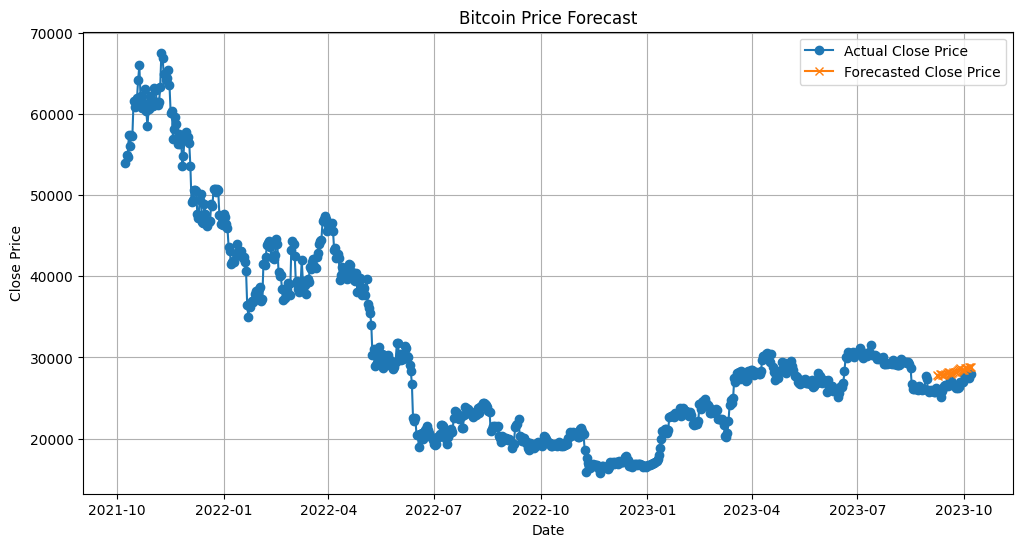

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Actual Close Price', marker='o')
plt.plot(data['Date'].tail(len(forecast)), forecast, label='Forecasted Close Price', marker='x')
plt.title('Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
forecast = prediction.forecast
print(forecast)

                   Close
2023-10-08  27856.824348
2023-10-09  27723.327813
2023-10-10  27905.442354
2023-10-11  27997.943605
2023-10-12  27797.641027
2023-10-13  27866.401634
2023-10-14  27812.843957
2023-10-15  27898.190090
2023-10-16  28105.472154
2023-10-17  28196.675446
2023-10-18  28215.291725
2023-10-19  28137.940598
2023-10-20  27960.877320
2023-10-21  28139.394868
2023-10-22  28240.657112
2023-10-23  28238.171205
2023-10-24  28259.860293
2023-10-25  28314.186688
2023-10-26  28412.933999
2023-10-27  28586.264933
2023-10-28  28719.353753
2023-10-29  28493.854464
2023-10-30  28495.815902
2023-10-31  28482.504791
2023-11-01  28649.927819
2023-11-02  28652.362270
2023-11-03  28687.975588
2023-11-04  28791.223579
2023-11-05  28812.928114
2023-11-06  28854.046748


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines', name='Actual Close Price'))
fig.add_trace(go.Scatter(x=data['Date'].tail(len(forecast)), y=forecast, mode='lines', name='Forecasted Close Price'))
fig.update_layout(title='Bitcoin Price Forecast',
                  xaxis_title='Date',
                  yaxis_title='Close Price')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines', name='Actual Close Price'))
fig.add_trace(go.Scatter(x=data['Date'].tail(len(forecast)), y=forecast, mode='lines', name='Forecasted Close Price'))
fig.update_layout(title='Bitcoin Price Forecast',
                  xaxis_title='Date',
                  yaxis_title='Close Price')
fig.show()
